In [16]:
import pandas as pd
import numpy as np

import xgboost as xgb




In [17]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix,classification_report
import seaborn as sns
import matplotlib.pyplot as plt

In [18]:
data=pd.read_csv('../data/Data.csv')
labels=pd.read_csv('../data/Label.csv')

In [19]:


# Replace all values >= 1 with 1 (converting all attack flows to 1)
labels['Label'] = labels['Label'].apply(lambda la: 1 if la >= 1 else 0)

# Verify the changes
print(labels['Label'].value_counts())


Label
0    358332
1     89583
Name: count, dtype: int64


In [20]:
print("Data shape before processing:", data.shape)

# Check for missing values in each column
missing_values_column = data.isnull().sum()
if missing_values_column.sum() > 0:
    print("Columns with missing values:")
    print(missing_values_column[missing_values_column > 0])  # Display columns with missing values
else:
    print("No missing values found in the data.")

# Find the number of unique values in each column
unique_values = data.nunique()
print("Number of unique values in each column:")
print(unique_values)

# Drop columns with only one unique value
for col in data.columns:
    if data[col].nunique() == 1:
        data.drop(col, axis=1, inplace=True)
        print(f"Dropped column: {col}")

Data shape before processing: (447915, 76)
No missing values found in the data.
Number of unique values in each column:
Flow Duration                 174373
Total Fwd Packet                 847
Total Bwd packets                928
Total Length of Fwd Packet      7697
Total Length of Bwd Packet      9322
                               ...  
Active Min                      1778
Idle Mean                       2280
Idle Std                         611
Idle Max                        2280
Idle Min                        2280
Length: 76, dtype: int64
Dropped column: Bwd PSH Flags
Dropped column: Fwd URG Flags
Dropped column: Bwd URG Flags
Dropped column: URG Flag Count
Dropped column: CWR Flag Count
Dropped column: ECE Flag Count
Dropped column: Fwd Bytes/Bulk Avg
Dropped column: Fwd Packet/Bulk Avg
Dropped column: Fwd Bulk Rate Avg


In [21]:
X_train, X_test, y_train, y_test = train_test_split(data, labels['Label'], test_size=0.2, random_state=42)

In [22]:
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [36]:
y_pred = rf_classifier.predict(X_test)

Analyis of the binary classifier

Accuracy: 0.9821
Precision: 0.9298
Recall: 0.9848
F1-Score: 0.9565


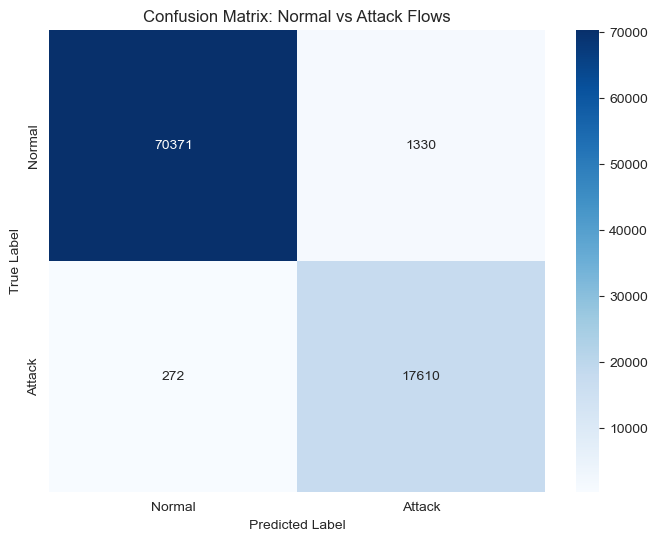

In [37]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Normal', 'Attack'], yticklabels=['Normal', 'Attack'])
plt.title('Confusion Matrix: Normal vs Attack Flows')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

In [44]:
data1 = pd.read_csv('../data/Data.csv')
labels1 = pd.read_csv('../data/Label.csv')


combined_data = pd.concat([data1, labels1], axis=1)

# Filter rows where 'Label' is 0
filtered_data = combined_data[combined_data['Label'] > 0]

# Extract filtered data and labels
filtered_data_only = filtered_data.drop(columns=['Label'])
filtered_labels_only = filtered_data['Label']

print("Filtered data shape:", filtered_data_only.shape)
print("Filtered labels shape:", filtered_labels_only.shape)

Filtered data shape: (89583, 76)
Filtered labels shape: (89583,)


In [45]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(filtered_data_only, filtered_labels_only, test_size=0.2, random_state=42)

In [46]:
print("Training data shape:", X_train1.shape, y_train1.shape)
print("Testing data shape:", X_test1.shape, y_test1.shape)

Training data shape: (71666, 76) (71666,)
Testing data shape: (17917, 76) (17917,)


In [47]:
y_train1 = y_train1 - 1
y_test1 = y_test1 - 1

In [48]:
print(np.unique(y_train1))
print(np.unique(y_test1))

[0 1 2 3 4 5 6 7 8]
[0 1 2 3 4 5 6 7 8]


In [49]:
print(filtered_labels_only.nunique())

9


In [31]:
xgb_classifier = xgb.XGBClassifier(random_state=42)

In [32]:
xgb_classifier.fit(X_train1, y_train1)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [33]:
y_pred1 = xgb_classifier.predict(X_test1)

Accuracy: 0.7648
Precision: 0.7792
Recall: 0.7648
F1-Score: 0.7533


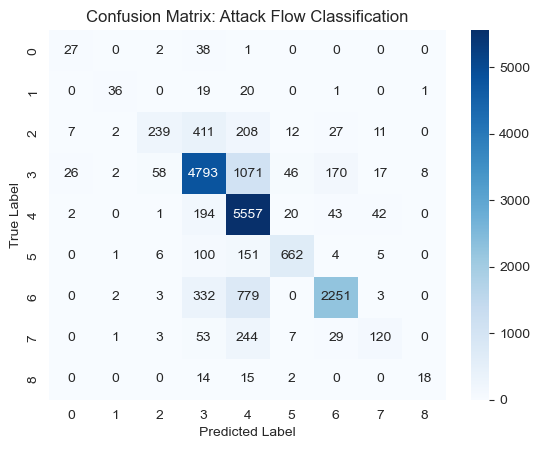

In [34]:
accuracy = accuracy_score(y_test1, y_pred1)
precision = precision_score(y_test1, y_pred1, average='weighted')
recall = recall_score(y_test1, y_pred1, average='weighted')
f1 = f1_score(y_test1, y_pred1, average='weighted')

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

# Plot confusion matrix
cm = confusion_matrix(y_test1, y_pred1)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix: Attack Flow Classification')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

In [50]:
report = classification_report(y_test1, y_pred1, target_names=[str(i) for i in np.unique(y_test1)])
print("Classification Report for All Labels:")
print(report)

Classification Report for All Labels:
              precision    recall  f1-score   support

           0       0.44      0.40      0.42        68
           1       0.82      0.47      0.60        77
           2       0.77      0.26      0.39       917
           3       0.81      0.77      0.79      6191
           4       0.69      0.95      0.80      5859
           5       0.88      0.71      0.79       929
           6       0.89      0.67      0.76      3370
           7       0.61      0.26      0.37       457
           8       0.67      0.37      0.47        49

    accuracy                           0.76     17917
   macro avg       0.73      0.54      0.60     17917
weighted avg       0.78      0.76      0.75     17917

